In [1]:
from ecpp import atkin_morain, trial_division
from miller_rabin import miller_rabin, miller_rabin_once

from joblib import Parallel, delayed
from tqdm import tqdm_notebook
import time
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(context='talk')
%matplotlib inline

# Доля свидетелей

In [2]:
bound = 10**4

def witness_fraction(n):
    if trial_division(n):
        return 0
    
    fraction = 0
    for a in range(1, n):
        if not miller_rabin_once(n, a):
            fraction += 1
    return fraction / float(n - 1)
    

%time fractions_of_witnesses = Parallel(n_jobs=2)(delayed(witness_fraction)(n) for n in range(5, bound, 2))
fractions_of_witnesses = [x for x in fractions_of_witnesses if x != 0]

CPU times: user 328 ms, sys: 129 ms, total: 457 ms
Wall time: 31.5 s


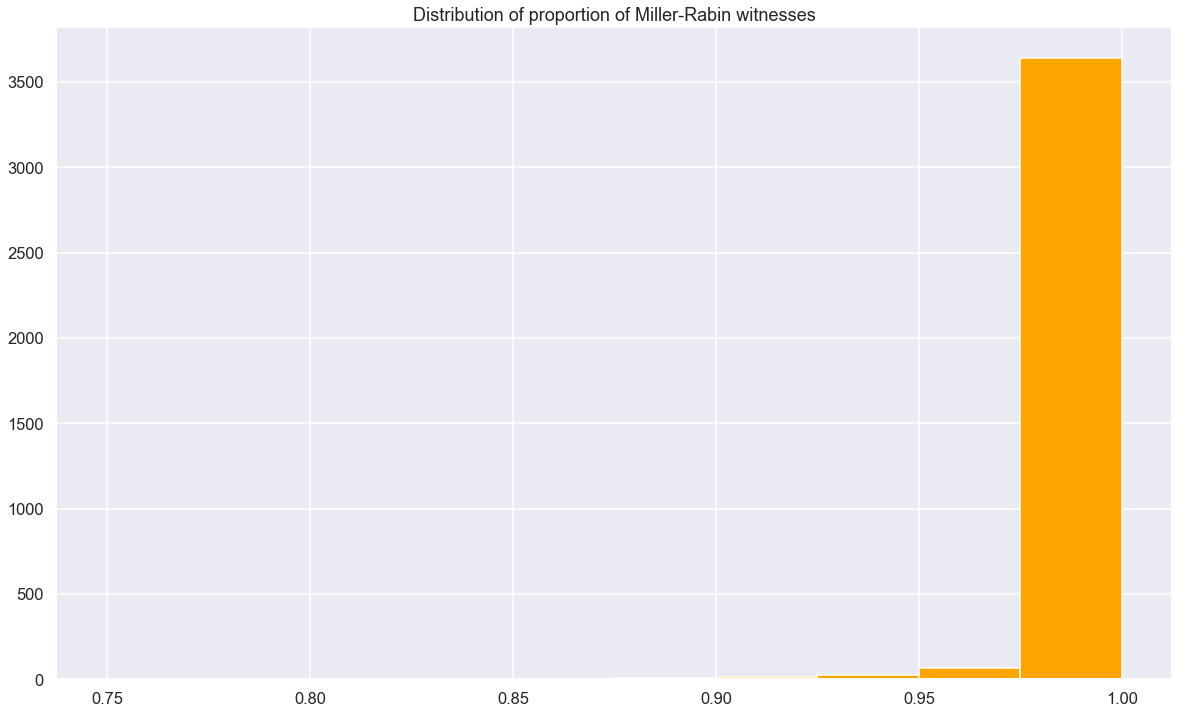

In [6]:
plt.figure(figsize=(20, 12))
plt.title('Distribution of proportion of Miller-Rabin witnesses')
plt.hist(fractions_of_witnesses, color='orange');

# Асимптотика

In [25]:
from nzmath import prime

nums, times = [], []
for n in tqdm_notebook(range(30, 52)):
    nprime = prime.nextPrime(int(np.exp(np.exp(n / 10.0))))
    
    start = time.time()
    atkin_morain(nprime)
    elapsed = time.time() - start
    
    nums.append(nprime)
    times.append(elapsed)

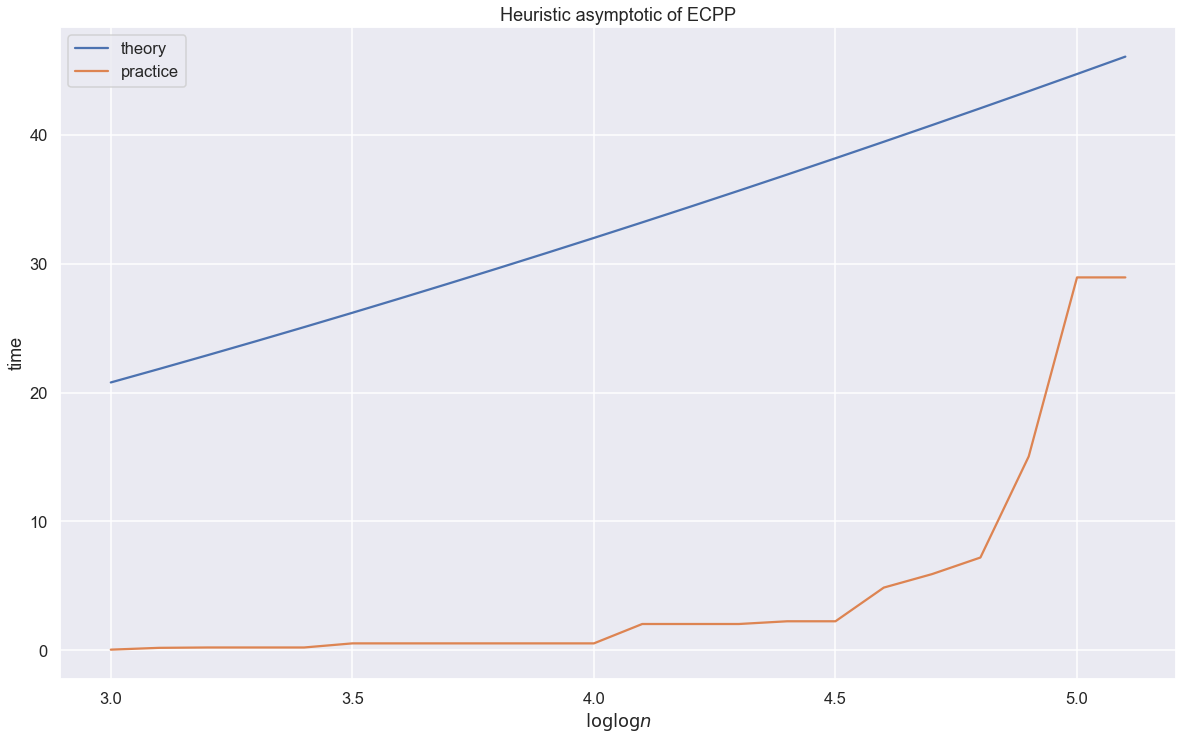

In [31]:
import numpy as np
from math import log

nums, times = np.array(nums), np.array(times)

plt.figure(figsize=(20, 12))
plt.title('Heuristic asymptotic of ECPP')
plt.xlabel(r'$\log\log n$')
plt.ylabel('time')
x = np.array([log(log(num)) for num in nums])
plt.plot(x, 4 * np.exp(np.log(x) * 1.5), label='theory')
plt.plot(x, np.maximum.accumulate(times), label='practice')
plt.legend();